In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats

In [3]:
df= pd.read_csv('/content/udemy_courses_dataset.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
#Nos centraremos en al columna precios de los cursos

df.rename(columns={'price':'X'}, inplace=True)
df.columns



Index(['course_id', 'course_title', 'url', 'is_paid', 'X', 'num_subscribers',
       'num_reviews', 'num_lectures', 'level', 'content_duration',
       'published_timestamp', 'subject'],
      dtype='object')

In [6]:
Tabla_Frecuencia=pd.DataFrame()
#X son nuestros precios de los cursos

#Frecuencia absoluta es la cantidad de veces que se repite nuestros precios (X).
Tabla_Frecuencia["Frecuencia_absolutas"]=df["X"].value_counts().sort_index()


#Acumulada absoluta es la suma de la frecuencia absoluta que se va acumulando.
Tabla_Frecuencia['Acumulada_Absoluta']=Tabla_Frecuencia["Frecuencia_absolutas"].cumsum()

RecoleccionFrecuencia =Tabla_Frecuencia["Frecuencia_absolutas"].cumsum()

#Frecuencia Relativa es la suma del total de los precios (X) dividido la acumulada Absoluta
Tabla_Frecuencia["Frecuencia_Relativa"]=df["X"].value_counts(normalize=True)

#Acumulada relativa es la suma de las frecuencias relativas que se van acumulando.
Tabla_Frecuencia["Acumulada_Relativa"]=Tabla_Frecuencia["Frecuencia_Relativa"].cumsum()

Tabla_Frecuencia


,Frecuencia_absolutas,Acumulada_Absoluta,Frecuencia_Relativa,Acumulada_Relativa
X,,,,
0,310,310,0.084285,0.084285
20,830,1140,0.225666,0.309951
25,154,1294,0.041871,0.351822
30,166,1460,0.045133,0.396955
35,116,1576,0.031539,0.428494
40,217,1793,0.058999,0.487493
45,83,1876,0.022567,0.510060
50,468,2344,0.127243,0.637303
55,35,2379,0.009516,0.646819


In [7]:
#Calculo de media
Media= df["X"].mean()
print("MEDIA:",Media)

#Calculo de moda
moda= df["X"].mode()[0]
print("MODA:",moda)

#Calculo de Mediana
Mediana= df["X"].median()
print("MEDIANA:",Mediana)


MEDIA: 66.0494834148994
MODA: 20
MEDIANA: 45.0


In [8]:
#Calculo de medida de dispersion
#Rango
Rango=df["X"].max()-df['X'].min()
print("Rango:", Rango)

#Varianza
suma_cuadrada = sum((df["X"] - Media)**2)
n = len(df["X"])
varianza_muestral = suma_cuadrada/(n-1)
print("Varianza muestral:",varianza_muestral)

#Desvio estandar
Desvio_Estandar=statistics.stdev(df['X'])
print("DESVIO ESTANDAR:",Desvio_Estandar)


Rango: 200
Varianza muestral: 3721.702201256114
DESVIO ESTANDAR: 61.00575547647982


In [9]:
#GRAFICOS
print(f"""
1er cuartil: {np.quantile(df["X"],0.25)}
2do cuartil: {np.quantile(df["X"],0.50)}
3er cuartil: {np.quantile(df["X"],0.75)}
""")



1er cuartil: 20.0
2do cuartil: 45.0
3er cuartil: 95.0



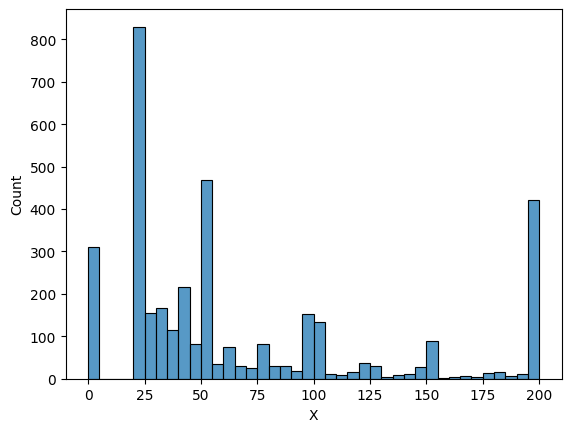

In [10]:
#Histograma

histograma = sns.histplot(df['X'], bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200])



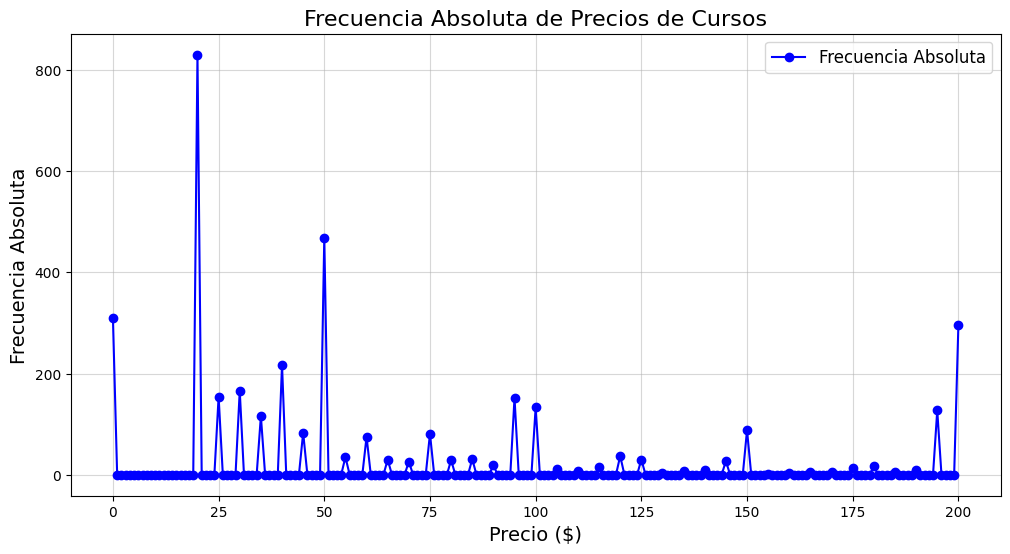

In [11]:
#Poligono de Frecuencia
# poligono = plt.plot(df['X'])

valores_completos = range(df['X'].min(), df['X'].max() + 1)
frecuencia_absoluta_grafico = df['X'].value_counts().reindex(valores_completos, fill_value=0)
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_absoluta_grafico.index, frecuencia_absoluta_grafico.values, 'bo-', label='Frecuencia Absoluta')
plt.title('Frecuencia Absoluta de Precios de Cursos', fontsize=16)
plt.xlabel('Precio ($)', fontsize=14)
plt.ylabel('Frecuencia Absoluta', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()


<Axes: >

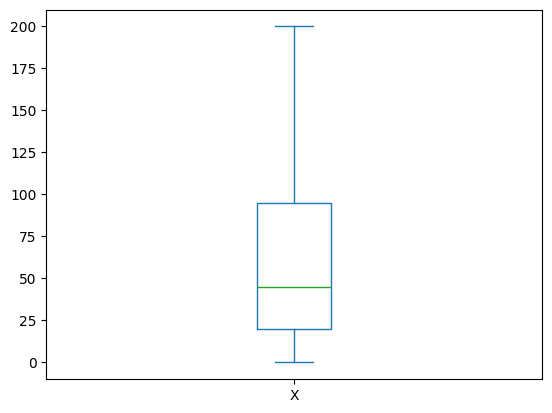

In [12]:
#Grafico de caja

df['X'].plot.box()

<Axes: ylabel='Density'>

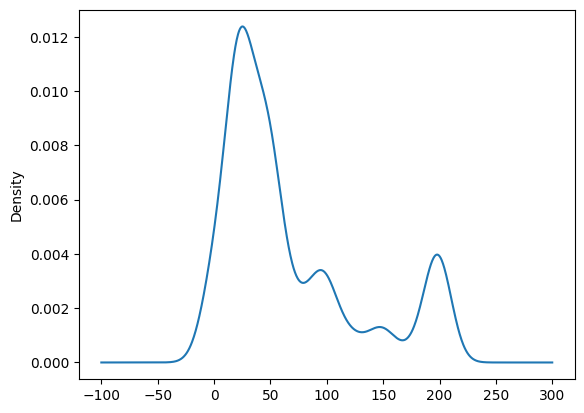

In [13]:
df['X'].plot.kde()

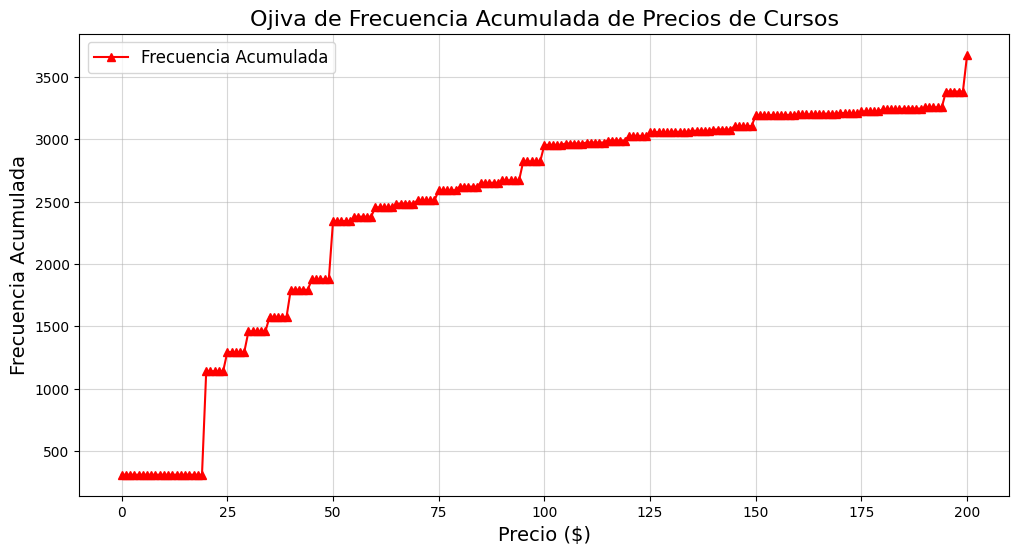

In [14]:
frecuencia_acumulada = frecuencia_absoluta_grafico.cumsum()

# Graficar la ojiva
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_acumulada.index, frecuencia_acumulada.values, 'r^-', label='Frecuencia Acumulada')
plt.title('Ojiva de Frecuencia Acumulada de Precios de Cursos', fontsize=16)
plt.xlabel('Precio ($)', fontsize=14)
plt.ylabel('Frecuencia Acumulada', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.show()

In [23]:
# Identificar el estadístico muestra (media, desvío estándar, proporción)

# Media muestral
media_muestral = df["X"].mean()
print("Media muestral:", media_muestral)

# Desviación estándar muestral
desviacion_estandar_muestral = df["X"].std()
print("Desviación estándar muestral:", desviacion_estandar_muestral)

# Proporción (si aplica, por ejemplo, la proporción de cursos con precio mayor a $50)
proporcion_mayor_50 = (df["X"] > 50).mean()
print("Proporción de cursos con precio mayor a $50:", proporcion_mayor_50)

Media muestral: 66.0494834148994
Desviación estándar muestral: 61.00575547648037
Proporción de cursos con precio mayor a $50: 0.36269711799891247


In [18]:
# Calcular el intervalo de confianza para los estadísticos muestrales.

# Intervalo de confianza para la media
n = len(df["X"])  # Tamaño de la muestra
confidence_level = 0.95  # Nivel de confianza deseado (por ejemplo, 95%)
degrees_of_freedom = n - 1  # Grados de libertad
standard_error = desviacion_estandar_muestral / np.sqrt(n)  # Error estándar
t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)  # Valor crítico t
margin_of_error = t_critical * standard_error  # Margen de error

confidence_interval_mean = (media_muestral - margin_of_error, media_muestral + margin_of_error)
print("Intervalo de confianza para la media:", confidence_interval_mean)


# Intervalo de confianza para la desviación estándar (usando chi-cuadrado)
alpha = 1 - confidence_level  # Nivel de significancia
chi_squared_lower = stats.chi2.ppf(1 - alpha / 2, degrees_of_freedom)  # Valor crítico chi-cuadrado inferior
chi_squared_upper = stats.chi2.ppf(alpha / 2, degrees_of_freedom)  # Valor crítico chi-cuadrado superior

confidence_interval_std = (
    np.sqrt(((n - 1) * desviacion_estandar_muestral**2) / chi_squared_lower),
    np.sqrt(((n - 1) * desviacion_estandar_muestral**2) / chi_squared_upper),
)
print("Intervalo de confianza para la desviación estándar:", confidence_interval_std)


# Intervalo de confianza para la proporción (si aplica)
# Si se calcula la proporción, se puede usar la fórmula de la proporción muestral y el error estándar
# para calcular el intervalo de confianza usando la distribución normal.
# Se pueden usar las funciones stats.norm.ppf() y stats.norm.cdf() para obtener el valor crítico Z
# y la probabilidad acumulada, respectivamente.


Intervalo de confianza para la media: (64.07726041837365, 68.02170641142514)
Intervalo de confianza para la desviación estándar: (59.64287539397589, 62.43283505899208)


In [19]:
#Estimar el error estándar (z,t o h)

# Error estándar para la media
standard_error_mean = desviacion_estandar_muestral / np.sqrt(n)
print("Error estándar para la media:", standard_error_mean)

# Error estándar para la proporción (si aplica)
# Si se calcula la proporción, se puede usar la fórmula del error estándar de la proporción.
# Por ejemplo:
# standard_error_proportion = np.sqrt((proporcion_mayor_50 * (1 - proporcion_mayor_50)) / n)


# Elegir el error estándar adecuado (z, t o h) depende de la situación.
# - z: se usa para la media de la población con desviación estándar conocida (o con muestra grande)
# - t: se usa para la media de la población con desviación estándar desconocida (o con muestra pequeña)
# - h: se usa para la proporción de la población

# En este caso, dado que la desviación estándar de la población es desconocida y estamos trabajando con la media muestral, debemos usar el error estándar t.
# El error estándar t ya se calculó como "standard_error_mean" en el código anterior.

Error estándar para la media: 1.0059234840714515


In [25]:
# Utilizar la distribución adecuada, según el tamaño de la muestra


n = len(df["X"])

# Elegir la distribución adecuada
if n >= 30:
    # Si el tamaño de la muestra es mayor o igual a 30, se puede usar la distribución normal
    print("Usando la distribución normal para la media.")

    # Calcular el intervalo de confianza para la media
    confidence_level = 0.95
    z_critical = stats.norm.ppf((1 + confidence_level) / 2)
    margin_of_error = z_critical * (desviacion_estandar_muestral / np.sqrt(n))
    confidence_interval_mean = (media_muestral - margin_of_error, media_muestral + margin_of_error)
    print("Intervalo de confianza para la media:", confidence_interval_mean)

else:
    # Si el tamaño de la muestra es menor a 30, se usa la distribución t de Student
    print("Usando la distribución t de Student para la media.")

    # Calcular el intervalo de confianza para la media
    confidence_level = 0.95
    degrees_of_freedom = n - 1
    t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)
    margin_of_error = t_critical * (desviacion_estandar_muestral / np.sqrt(n))
    confidence_interval_mean = (media_muestral - margin_of_error, media_muestral + margin_of_error)
    print("Intervalo de confianza para la media:", confidence_interval_mean)


# Podemos también calcular intervalos de confianza para la desviación estándar usando la distribución chi-cuadrado
# o para proporciones usando la distribución normal.

Usando la distribución normal para la media.
Intervalo de confianza para la media: (64.07790961491631, 68.02105721488249)


In [22]:
#Calcular el valor del parámetro poblacional

# Calcular el intervalo de confianza para la media poblacional
confidence_level = 0.95  # Nivel de confianza deseado (por ejemplo, 95%)
n = len(df["X"])  # Tamaño de la muestra
degrees_of_freedom = n - 1  # Grados de libertad
standard_error = desviacion_estandar_muestral / np.sqrt(n)  # Error estándar

if n >= 30:
  # Si el tamaño de la muestra es grande (n >= 30), se puede usar la distribución normal
  z_critical = stats.norm.ppf((1 + confidence_level) / 2)  # Valor crítico Z
  margin_of_error = z_critical * standard_error  # Margen de error
  confidence_interval_mean = (media_muestral - margin_of_error, media_muestral + margin_of_error)
  print("Intervalo de confianza para la media (usando Z):", confidence_interval_mean)
else:
  # Si el tamaño de la muestra es pequeño (n < 30), se debe usar la distribución t de Student
  t_critical = stats.t.ppf((1 + confidence_level) / 2, degrees_of_freedom)  # Valor crítico t
  margin_of_error = t_critical * standard_error  # Margen de error
  confidence_interval_mean = (media_muestral - margin_of_error, media_muestral + margin_of_error)
  print("Intervalo de confianza para la media (usando t):", confidence_interval_mean)



Intervalo de confianza para la media (usando Z): (64.07790961491631, 68.02105721488249)
